In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


"""
Handling missing values
Get rid of the row: reduces no. of samples
Get rid of the feature
Imputation:
cts features: mean, median
discrete features: mode
"""

In [7]:
dataset['LotFrontage'].isna().sum() # number of missing values in the column

259

In [8]:
dataset['Neighborhood'].value_counts()       ## it give count of each value

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [9]:
grp_data = dataset.groupby(by=['Neighborhood'])

In [10]:
grp_data.first()           ## it shows values of first in each group

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,220,120,RL,43.0,3010,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,3,2006,New,Partial,167240
Blueste,600,160,RM,24.0,1950,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,None,0,7,2008,COD,Normal,151000
BrDale,226,160,RM,21.0,1680,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2009,COD,Abnorml,112000
BrkSide,10,190,RL,50.0,7420,Pave,Pave,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,0,1,2008,WD,Normal,118000
ClearCr,70,50,RL,81.0,15593,Pave,None,Reg,Lvl,AllPub,...,0,None,GdWo,Shed,0,7,2006,WD,Normal,225000
CollgCr,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,0,2,2008,WD,Normal,208500
Crawfor,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
Edwards,40,90,RL,65.0,6040,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2008,WD,AdjLand,82000
Gilbert,51,60,RL,74.0,13869,Pave,None,IR2,Lvl,AllPub,...,0,None,MnPrv,Shed,0,7,2007,WD,Normal,177000


In [11]:
grp_data.groups        ## it will give indices each row group by neighbours

{'Blmngtn': [219, 229, 385, 443, 465, 559, 597, 639, 790, 851, 982, 1004, 1019, 1023, 1126, 1394, 1415], 'Blueste': [599, 956], 'BrDale': [225, 227, 232, 235, 363, 430, 432, 500, 655, 837, 1029, 1104, 1219, 1291, 1334, 1378], 'BrkSide': [9, 15, 29, 51, 77, 146, 149, 184, 250, 275, 289, 328, 345, 361, 393, 437, 442, 459, 497, 522, 531, 533, 546, 555, 584, 586, 589, 636, 694, 696, 710, 713, 761, 807, 826, 912, 935, 960, 974, 976, 995, 1098, 1135, 1139, 1145, 1202, 1218, 1255, 1263, 1285, 1321, 1323, 1352, 1389, 1397, 1400, 1414, 1443], 'ClearCr': [69, 120, 153, 166, 176, 249, 271, 279, 351, 358, 371, 384, 451, 457, 588, 682, 706, 789, 800, 818, 828, 848, 939, 1065, 1173, 1262, 1270, 1287], 'CollgCr': [0, 2, 13, 22, 32, 36, 43, 57, 59, 64, 67, 89, 94, 96, 103, 112, 119, 138, 139, 141, 143, 150, 192, 194, 203, 213, 214, 216, 220, 233, 236, 248, 257, 258, 261, 290, 301, 302, 303, 305, 337, 355, 374, 376, 382, 388, 396, 401, 428, 435, 444, 464, 476, 478, 518, 536, 539, 590, 593, 594, 604, 60

In [12]:
mean_LotFrontage = dataset.groupby(by = ['Neighborhood']).mean()
mean_LotFrontage

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,773.941176,114.117647,47.142857,3398.176471,7.176471,5.000000,2005.235294,2005.764706,45.588235,196.000000,...,147.294118,15.529412,0.000000,0.000000,8.470588,0.000000,0.000000,5.705882,2007.470588,194870.882353
Blueste,778.500000,160.000000,24.000000,1625.000000,6.000000,6.000000,1980.000000,1980.000000,0.000000,183.000000,...,155.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.500000,137500.000000
BrDale,719.187500,160.000000,21.562500,1801.000000,5.687500,5.437500,1971.437500,1973.625000,307.562500,250.437500,...,68.250000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.812500,2007.687500,104493.750000
BrkSide,734.724138,49.741379,57.509804,7360.413793,5.051724,6.137931,1931.431034,1968.586207,7.396552,195.741379,...,35.844828,25.344828,39.844828,2.482759,20.896552,0.000000,35.689655,6.206897,2007.672414,124834.051724
ClearCr,604.928571,52.500000,83.461538,30875.750000,5.892857,5.678571,1966.571429,1983.750000,84.571429,620.892857,...,188.821429,64.821429,32.535714,4.642857,34.928571,0.000000,32.142857,6.785714,2007.785714,212565.428571
CollgCr,726.840000,43.300000,71.682540,9619.146667,6.640000,5.240000,1997.886667,1999.140000,97.879195,456.586667,...,114.320000,51.720000,0.226667,2.593333,4.300000,0.000000,16.333333,6.140000,2007.806667,197965.773333
Crawfor,801.078431,58.235294,71.804878,11809.686275,6.274510,6.588235,1941.549020,1979.196078,82.740000,466.803922,...,52.568627,27.000000,46.176471,10.803922,30.176471,0.000000,49.019608,6.862745,2007.490196,210624.725490
Edwards,762.930000,56.800000,68.217391,10218.650000,5.080000,5.440000,1955.970000,1975.110000,50.470000,424.460000,...,70.770000,33.240000,26.380000,1.800000,15.250000,12.180000,16.000000,5.750000,2007.940000,128219.700000
Gilbert,749.151899,58.227848,79.877551,11379.151899,6.556962,5.126582,1998.253165,1998.822785,42.051282,214.025316,...,102.822785,42.632911,0.000000,10.974684,3.683544,0.000000,21.265823,6.594937,2007.556962,192854.506329


In [13]:
mean_LotFrontage = dataset.groupby(by = ['Neighborhood']).mean()['LotFrontage']
mean_LotFrontage          # mean value of lotfrontage group by Neighbourhood

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [14]:
temp = dataset.groupby(['Neighborhood'])['LotFrontage'].fillna(mean_LotFrontage)
temp.isnull().sum()

259

In [15]:
print(temp)

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64


In [16]:
## to print all values
print(*temp)

65.0 80.0 68.0 60.0 84.0 85.0 75.0 nan 51.0 50.0 70.0 85.0 nan 91.0 nan 51.0 nan 72.0 66.0 70.0 101.0 57.0 75.0 44.0 nan 110.0 60.0 98.0 47.0 60.0 50.0 nan 85.0 70.0 60.0 108.0 112.0 74.0 68.0 65.0 84.0 115.0 nan nan 70.0 61.0 48.0 84.0 33.0 66.0 nan 52.0 110.0 68.0 60.0 100.0 24.0 89.0 66.0 60.0 63.0 60.0 44.0 50.0 nan 76.0 nan 72.0 47.0 81.0 95.0 69.0 74.0 85.0 60.0 21.0 nan 50.0 72.0 60.0 100.0 32.0 78.0 80.0 nan 121.0 122.0 40.0 105.0 60.0 60.0 85.0 80.0 60.0 69.0 nan 78.0 73.0 85.0 77.0 nan 77.0 64.0 94.0 nan 75.0 60.0 50.0 85.0 105.0 75.0 nan 77.0 nan 61.0 34.0 nan 74.0 90.0 65.0 nan 50.0 75.0 55.0 48.0 60.0 nan 55.0 69.0 69.0 88.0 nan 75.0 nan 78.0 80.0 nan 82.0 73.0 65.0 70.0 78.0 71.0 78.0 70.0 24.0 51.0 nan 63.0 nan 120.0 107.0 nan nan 84.0 60.0 60.0 92.0 100.0 134.0 nan 110.0 95.0 55.0 40.0 62.0 nan 86.0 62.0 nan nan 141.0 44.0 80.0 47.0 84.0 97.0 nan 63.0 60.0 nan 54.0 60.0 63.0 92.0 90.0 nan 60.0 64.0 41.0 70.0 nan 68.0 24.0 60.0 24.0 79.0 174.0 92.0 76.0 80.0 75.0 50.0 na

In [17]:
grp_data.get_group('Blmngtn')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
219,220,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,167240
229,230,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
385,386,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,192000
443,444,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
465,466,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740
559,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,234000
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
639,640,120,RL,53.0,3982,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,264561
790,791,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,160200
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000


## filling the nan vaalue in LotFrontage by grouping Neighborhood and taking mean by grouping

In [18]:

temp = dataset['LotFrontage'].fillna(dataset.groupby('Neighborhood')['LotFrontage'].transform('mean')) 


In [19]:
temp.isnull().sum()

0

In [20]:
dataset.iloc[1441,:]['LotFrontage']

nan

In [21]:
temp[1441]

71.68253968253968

In [22]:
dataset['LotFrontage'] = temp
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### to drop a feature

In [23]:
dataset['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [24]:
dataset = dataset.drop(['Alley','MiscFeature','PoolQC','Fence'] , axis =1)

In [25]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Feature Scaling

- want to bring features in same range
- affect the training of model , if your features are scaled then it training will be fast
- if we have scaled our data , then we can say which weight is more important than the other , otherwise we can't say

### min - max scaling
- ex - [1 , 2 , 3 ,4]
here we want our values to lie between 0 and 1
- step 1 , subtract the min value , by each element in list
- [0 , 1 ,2 , 3]
- step 2 , divide each element by max
- [0/3 , 1/3 , 2/3 , 3/3]
   


## standardization scaling

- there is no thumb rule you can anyone - min-max scaling or standardization

In [26]:
df.describe()

NameError: name 'df' is not defined

In [40]:
dataset.min()        ## it helps to find the min value for each feature same goes for max

C:\Users\SUBHAJ~1\AppData\Local\Temp/ipykernel_10908/1351257923.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.min()        ## it helps to find the min value for each feature same goes for max


Id                     1
MSSubClass            20
MSZoning         C (all)
LotFrontage         21.0
LotArea             1300
                  ...   
MoSold                 1
YrSold              2006
SaleType             COD
SaleCondition    Abnorml
SalePrice          34900
Length: 65, dtype: object

In [39]:
numerical_column = dataset.select_dtypes(['int64','float64'])
numerical_column

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [41]:
def min_max(data):
    min_ = data.min()
    max_ = data.max()
    df = dataset - min_ / (max_ - min_)
    return df

df = min_max(dataset.select_dtypes(['int64','float64']))

In [42]:
df.min()

1stFlrSF         333.923359
2ndFlrSF                0.0
3SsnPorch               0.0
BedroomAbvGr            0.0
BldgType               None
                   ...     
Utilities              None
WoodDeckSF              0.0
YearBuilt       1858.434783
YearRemodAdd         1917.5
YrSold               1504.5
Length: 77, dtype: object

### min_max scaling using sklearn

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
data = [[-1 , 2],[-0.5 , 6] , [0 , 10] , [1 , 18]]
scaler = MinMaxScaler()

In [29]:
print(scaler.fit(data))

MinMaxScaler()


In [30]:
print(scaler.data_max_)

[ 1. 18.]


In [31]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [32]:
print(scaler.transform([[2,2]]))

[[1.5 0. ]]


In [33]:

scaler.fit(dataset.select_dtypes(['int64','float64']))
df2 = scaler.transform(dataset.select_dtypes(['int64','float64']))
## df2 will be an array
## so create a dataframe out of it 

## get top features

In [34]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [35]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [36]:
numerical_columns = dataset.select_dtypes(['int64','float64'])
print(numerical_columns)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

In [43]:
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [44]:
## compute correlation
num_data = dataset[numerical_columns.columns]
num_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [45]:
## compute correlation among features
corr = num_data.corr()  
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.008474,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.374130,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.008474,-0.374130,1.000000,0.336997,0.236282,-0.047448,0.127706,0.086681,0.189757,0.227212,...,0.093130,0.140304,0.002560,0.065735,0.039270,0.174520,0.010560,0.010616,0.006565,0.346962
LotArea,-0.033226,-0.139781,0.336997,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.236282,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.047448,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.127706,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.086681,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.189757,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.227212,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [46]:
## to visualized the correlation , we can use heat map
import seaborn as sns

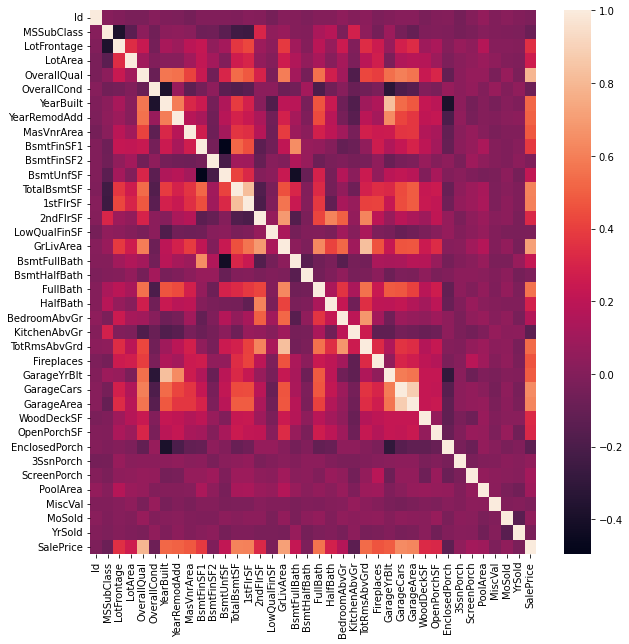

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

In [48]:
corr['SalePrice'].nlargest(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [49]:
top_feature = corr['SalePrice'].nlargest(10).index
top_feature

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

## Visualization

- univariate 
- bivariate

## univariate visualization
- discerte use bargraph
- continuous use histogram

In [50]:
uni_values , counts = np.unique(dataset['OverallQual'] , return_counts = True) ## it returns the no. of uniques value present in the feature along with it counts
print(uni_values , counts)

[ 1  2  3  4  5  6  7  8  9 10] [  2   3  20 116 397 374 319 168  43  18]


C:\Users\Subhajit ghosh\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


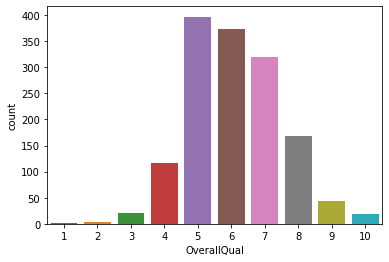

In [51]:
sns.barplot(uni_values , counts)
plt.xlabel('OverallQual')
plt.ylabel('count')
plt.show()

In [52]:
dataset['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

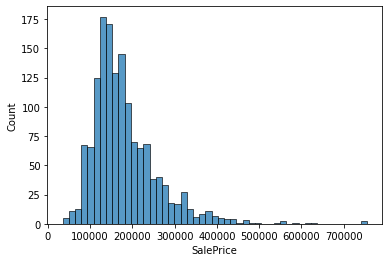

In [53]:
## Distribution of SalePrice
sns.histplot(dataset['SalePrice'])
plt.show()

## Bivarite analysis

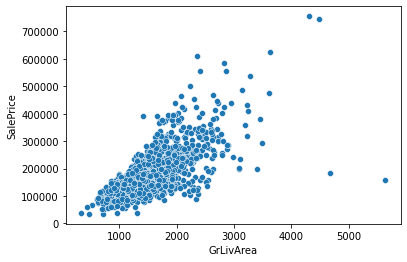

In [54]:
sns.scatterplot(x = dataset['GrLivArea'] , y =dataset['SalePrice'])
plt.show()

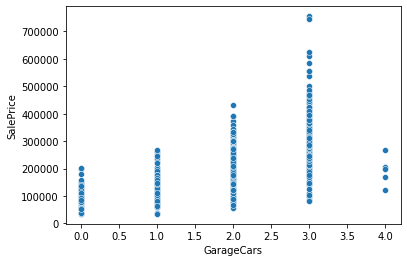

In [55]:
sns.scatterplot(x ='GarageCars' , y ='SalePrice' , data = dataset)
plt.show()

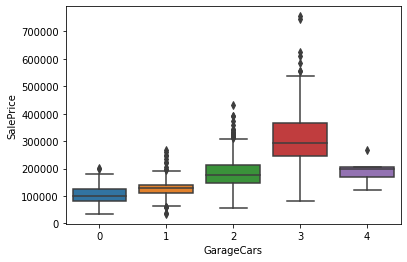

In [56]:
sns.boxplot(x ='GarageCars' , y ='SalePrice' , data = dataset)
plt.show()

## Feature Encoding

In [57]:
dataset['Street']

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object

In [58]:
dataset['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

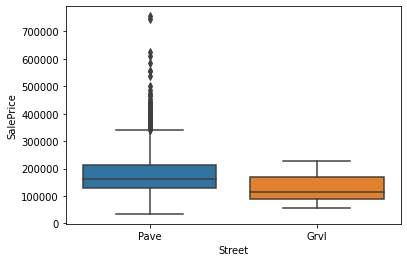

In [59]:
sns.boxplot(x = 'Street' , y = 'SalePrice' , data = dataset)
plt.show()

## labelEncoding and OneHotencoding

In [60]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [61]:
le = LabelEncoder()

In [63]:
a = ['b','b','b' , 'r','r','r' , 'w','w' , 'b']
le.fit_transform(a)                                 # training data

array([0, 0, 0, 1, 1, 1, 2, 2, 0], dtype=int64)

In [66]:
# for testing data just do transform not fit
b = ['b' , 'r' , 'r' , 'w' ]
le.transform(b)


array([0, 1, 1, 2])

In [69]:
encoded = le.transform(b)

In [70]:
le.inverse_transform(encoded)

array(['b', 'r', 'r', 'w'], dtype='<U1')

In [79]:
oe = OneHotEncoder(sparse = False)

In [80]:
a = np.array(['b','b','b' , 'r','r','r' , 'w','w' , 'b']).reshape(-1,1)

In [81]:
oe.fit(a)

OneHotEncoder(sparse=False)

In [82]:
oe.categories_

[array(['b', 'r', 'w'], dtype='<U1')]

In [83]:
oe.transform(a)         ## in one hot encoding it will make sparse matrix

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [91]:
oe2 = OneHotEncoder(sparse = False)

In [92]:
oe2.fit(np.array(['Grvl','Pave']).reshape(-1,1))

OneHotEncoder(sparse=False)

In [93]:
oe2.categories_

[array(['Grvl', 'Pave'], dtype='<U4')]

In [95]:
temp = oe2.transform(dataset['Street'].values.reshape(-1,1))

In [96]:
dataset['isGrvl'] = temp[:,0]   ## the column is grvl pave is added in the dataset
dataset['isPave'] = temp[:,1]
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isGrvl,isPave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,0.0,1.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,0.0,1.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,0.0,1.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,0.0,1.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,0.0,1.0


## HyperParameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [99]:
GridSearchCV?

In [100]:
from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression()

In [104]:
params = {
    'penalty' : ['l1','l2','none'],
    'C':[0,0.1,0.5,1],
    'max_iter':[100,200,1000]
}

In [105]:
clf = GridSearchCV(estimator = model ,param_grid = params,cv = 5,verbose = 1 )

In [106]:
from sklearn.datasets import load_iris

In [107]:
iris = load_iris()

In [109]:
iris['data'] , iris['target']

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [110]:
clf.fit(iris['data'] , iris['target'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='non

C:\Users\Subhajit ghosh\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Subhajit ghosh\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Subhajit ghosh\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueEr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.1, 0.5, 1], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'none']},
             verbose=1)

In [112]:
best_model = clf.best_estimator_
best_model

LogisticRegression(C=0, penalty='none')

- we use this best model to fit our data

In [114]:
y_pred = best_model.predict(iris['data'])

In [115]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])